<a href="https://colab.research.google.com/github/Dansouza-web/Dansouza-web/blob/main/Base_Ficticia_Projeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Primeiro antes de tudo começo importando as bibliotecas que vou usar na análise
import pandas as pd
import matplotlib.pyplot as plt

In [226]:
#Depois dou carga do arquivo para ter uma visualização inicial da base
df = pd.read_csv("vendas_ficticias.csv")
df.head()

,Data,Produto,Categoria,Quantidade,Preço Unitário,Custo,Região,Vendedor
0,2023-01-01 00:00:00.000000000,Webcam,Informática,12,1078.56,565.68,Leste,Bruno
1,2023-01-04 16:14:32.727272727,Monitor,Informática,2,333.72,167.38,Norte,Bruno
2,2023-01-08 08:29:05.454545454,Mesa,Acessórios,1,2824.54,1944.32,Sul,Eduardo
3,2023-01-12 00:43:38.181818181,Cadeira Gamer,Acessórios,16,1222.84,682.69,Oeste,Carlos
4,2023-01-15 16:58:10.909090909,Webcam,Informática,5,1577.37,822.26,Norte,Eduardo


In [ ]:
#Digito o df.info() para ver se tem algum tipo de dado errado como por exemplo se "quantidade" estar como "int64 mesmo"
df.info()

In [ ]:
# e vejo que a Data esta com o Dtype object e corrigo o tipo de dado
df.Data = pd.to_datetime(df.Data, format='%Y-%m-%d %H:%M:%S.%f')
df.info()
#Dtype de Data Corrigida✅

In [ ]:
#uso o df.describe para descrever pra mim as taxas de porcentagem, média, desvio padrão, minimo
df.describe().round(1)

In [ ]:
#uso o df.isnull para ver se tem algum valor faltante na base e o .sum() para somar tudo
df.isnull().sum()

In [ ]:
#crio uma nova coluna para obter a receita calculando a Quantidade vezes o Preço Unitário,
#e outra coluna para obter o Lucro bruto calculando Quantidade * Custo =
df['receita'] = df['Quantidade'] * df['Preço Unitário']
df['Lucro_Bruto'] = df['receita'] - df['Custo']
df

In [193]:
#uso o groupby para ver os vendedores que mais venderam
vendas_por_vendedor = df.groupby('Vendedor')['receita'].sum().round(2).sort_values(ascending=False)

print(vendas_por_vendedor)


Vendedor
Eduardo    412533.85
Ana        321808.16
Daniela    270425.06
Bruno      247931.70
Carlos     237269.47
Name: receita, dtype: float64


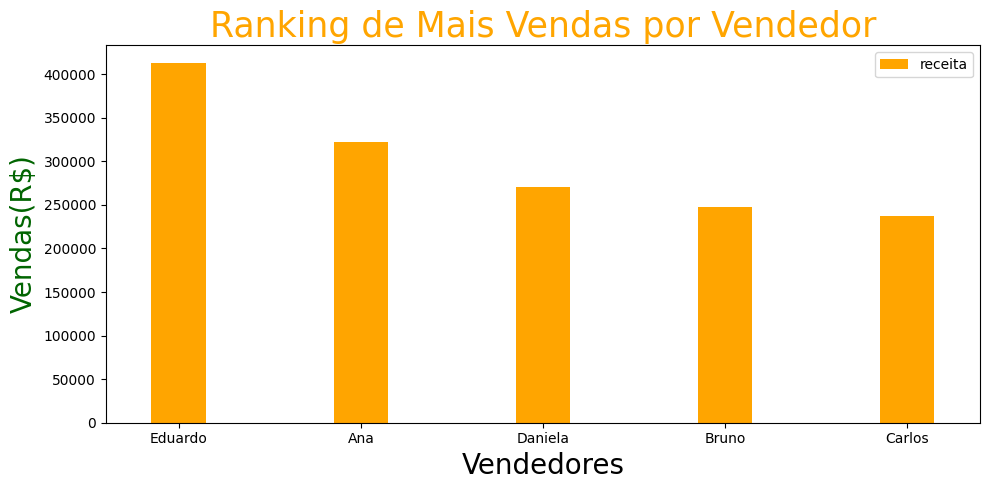

In [225]:
#Crio a visualização do ranking com mais vendedores
vendas_por_vendedor.plot(kind='bar', color='orange', figsize=(10, 5),width=0.3,legend=True)
plt.title('Ranking de Mais Vendas por Vendedor',color='orange',fontsize=25)
plt.xlabel('Vendedores',color='black',fontsize=20)
plt.ylabel('Vendas(R$)',color='darkgreen',fontsize=20)
plt.xticks(rotation=360)
plt.tight_layout()

In [ ]:
#uso o groupby novamente para ver os top 5 produtos mais vendidos por quatidade
top5_produtos_quantidade = df.groupby('Produto')['Quantidade'].sum().nlargest(5)
print(top5_produtos_quantidade)


#**Visualizações de Dados com o MatPlotLib**

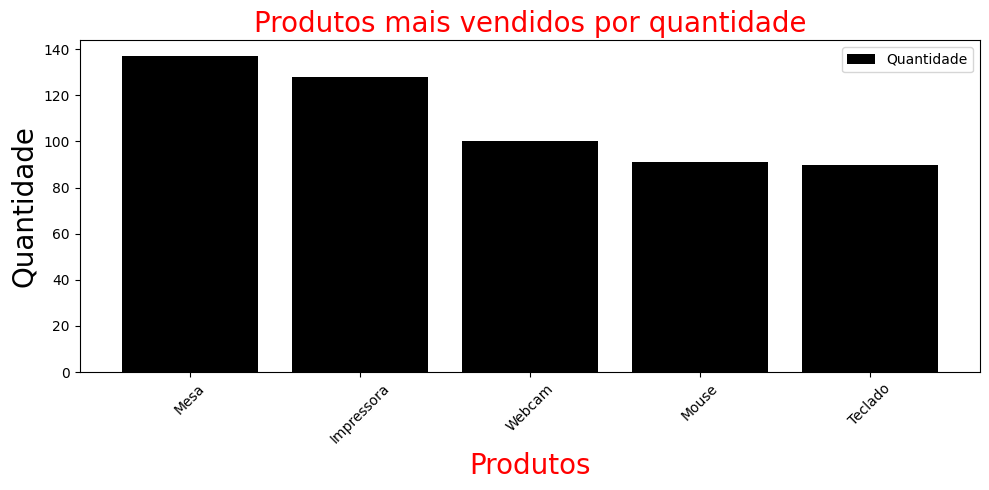

In [200]:
#Crio uma visualização dos produtos mais vendidos por quantidade
top5_produtos_quantidade.plot(kind='bar',color='black',figsize=(10,5),linestyle='-',legend=True, width=0.8)
plt.title('Produtos mais vendidos por quantidade',fontsize=20, color='red')#Titulo do grafico
plt.xlabel('Produtos', color='red',fontsize=20)#titulo eixo X
plt.ylabel('Quantidade',color='black',fontsize=20,)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df['ano_mes'] = pd.to_datetime(df['Data']).dt.to_period('M')
df.head()

In [ ]:
#Criando uma visualização do Lucro Bruto Mensal e verificando
df_vendas_mensal = df.groupby('ano_mes')['Lucro_Bruto'].sum().round(2)
df_vendas_mensal

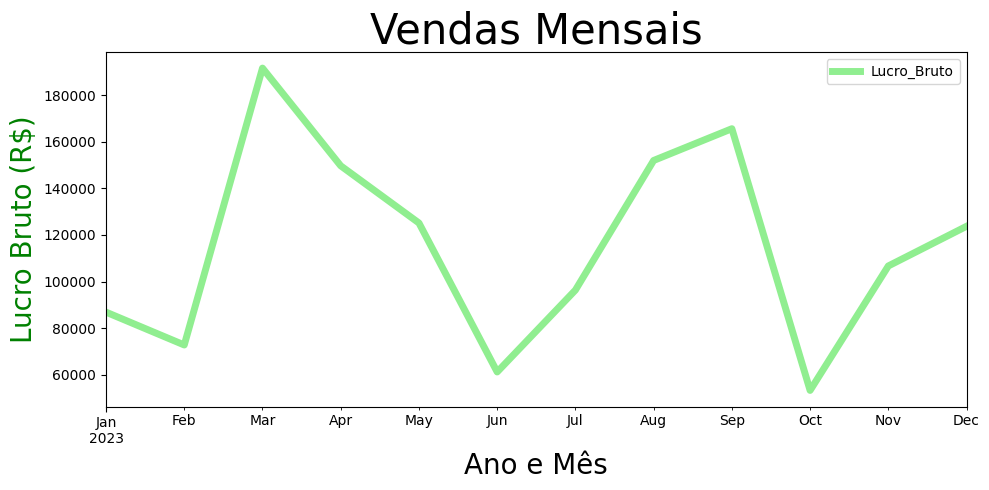

In [199]:
df_vendas_mensal.plot(kind='line',color='lightgreen',figsize=(10,5),linestyle='-',legend=True,linewidth=5)
plt.title('Vendas Mensais',fontsize=30, color='black')
plt.xlabel('Ano e Mês', color='black',fontsize=20)
plt.ylabel('Lucro Bruto (R$)',color='green',fontsize=20)
plt.tight_layout()

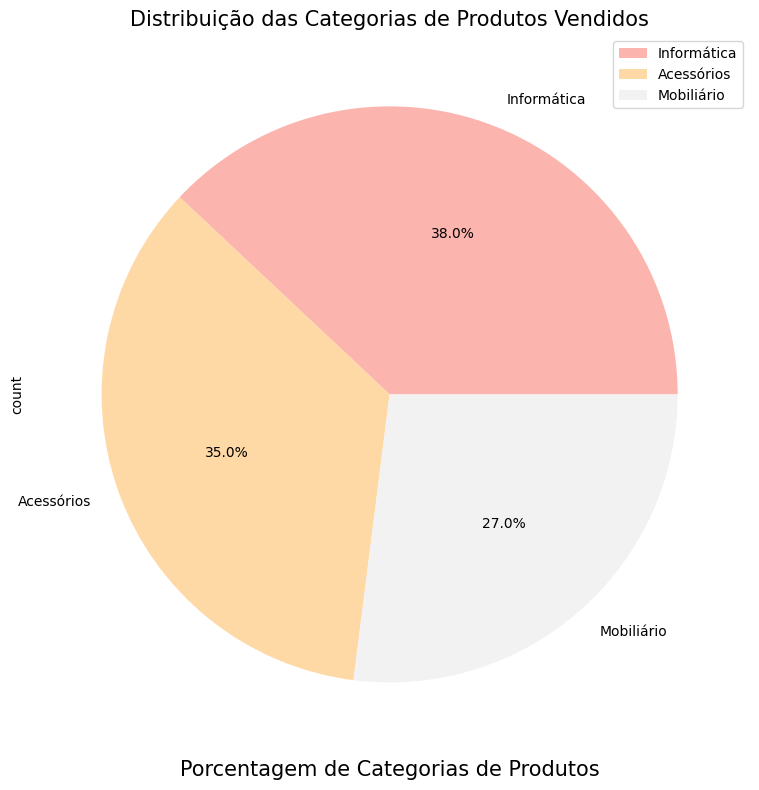

In [196]:
#converti o tipo da coluna categoria para um tipo de dado categórico
df['Categoria'] = pd.Categorical(df['Categoria'])
df['Categoria'].value_counts().plot(kind='pie', legend=True, autopct='%1.1f%%', colormap='Pastel1', figsize=(8, 8))
plt.title('Distribuição das Categorias de Produtos Vendidos', fontsize=15)
plt.xlabel('Porcentagem de Categorias de Produtos', fontsize=15)
plt.tight_layout()

In [ ]:
Lucro_Por_Região =df.groupby('Região')['Lucro_Bruto'].sum().sort_values(ascending=True)
df

In [ ]:
Lucro_Por_Região.plot(kind='barh',color='lightblue',figsize=(10,5))
plt.title('Lucro/Região')
plt.xlabel('Lucro',color='darkgreen',fontsize=15)
plt.ylabel('Região',color='black',fontsize=15)
